In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import itertools
import copy
from math import sqrt
from sklearn import metrics
from torch.autograd import Variable
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [138]:
df.head(2)

,dayofweek,month,day,hour,rush_hour,progrnum,cum_duration,temp,pressure,humidity,wind_speed
0,0,4,23,22,0,1,373,9.03,1012.0,81.0,8.2
1,0,4,23,22,0,2,408,8.99,1012.0,75.0,6.7


In [140]:
max(df['dayofweek']),min(df['dayofweek'])

(6, 0)

In [107]:
max(df['rush_hour']),min(df['rush_hour'])

(1, 0)

In [144]:
max(df['hour']),min(df['hour'])

(24, 6)

In [153]:
df = pd.read_csv('46a_1_calt.csv')

df = df.drop(columns=['dt','Unnamed: 0','tripid','stop_id','weather_main'])
dataset = df.copy()

In [154]:
dataset = dataset.sample(n=45808,replace = False, random_state=10)

In [155]:
dataset.head(2)

,dayofweek,month,day,hour,rush_hour,progrnum,cum_duration,temp,pressure,humidity,wind_speed
286965,3,2,1,16,1,40,3592,5.16,1013.0,70.0,8.75
361470,4,1,19,22,0,15,1155,2.17,1004.0,87.0,5.66


In [156]:
temp = []
for ind in range(dataset.shape[0]):
    temp.append(dataset.iloc[ind]['dayofweek']+1)

In [157]:
dataset['day_of_week']= temp

dataset = dataset.drop(columns=['dayofweek'])

In [158]:
dataset['day_of_week']

286965    4.0
361470    5.0
82999     5.0
424684    7.0
266597    6.0
110863    5.0
440594    5.0
56411     4.0
166683    5.0
333690    3.0
60408     7.0
313772    7.0
47655     5.0
367878    4.0
380165    3.0
301452    3.0
447528    1.0
321611    3.0
318845    5.0
371214    2.0
356198    5.0
265406    6.0
90780     2.0
34722     1.0
20267     2.0
233858    5.0
323986    5.0
356805    5.0
269390    6.0
423805    7.0
         ... 
51617     3.0
2709      6.0
98497     2.0
92030     1.0
443124    6.0
415155    2.0
349297    2.0
71036     1.0
344220    7.0
332352    3.0
129926    3.0
224122    6.0
427738    6.0
298174    1.0
41956     5.0
364788    4.0
55001     3.0
393396    4.0
405304    5.0
34905     1.0
193790    3.0
392203    5.0
63892     2.0
202754    4.0
246152    3.0
121076    4.0
206981    4.0
291252    4.0
3991      6.0
89163     2.0
Name: day_of_week, Length: 45808, dtype: float64

In [159]:
max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))

In [250]:
max_duration = max(dataset['cum_duration'])
min_duration = min(dataset['cum_duration'])
max_min_inverter = lambda x : (x)*(max_duration-min_duration)+min_duration

In [160]:
for feature in dataset.columns:
    dataset[feature] = dataset[[feature]].apply(max_min_scaler)

In [162]:
dataset['day_of_week'].replace({0:0.1},inplace=True)
dataset['rush_hour'].replace({0:0.5},inplace=True)

In [163]:
dataset.head(5)

,month,day,hour,rush_hour,progrnum,cum_duration,temp,pressure,humidity,wind_speed,day_of_week
286965,0.333333,0.000000,0.555556,1.0,0.684211,0.527487,0.549533,0.603774,0.545455,0.457524,0.500000
361470,0.000000,0.600000,0.888889,0.5,0.245614,0.168312,0.363240,0.433962,0.803030,0.285952,0.666667
82999,0.666667,0.500000,0.555556,1.0,0.017544,0.023139,0.752025,0.320755,0.803030,0.343143,0.666667
424684,0.000000,0.200000,0.777778,0.5,0.140351,0.050995,0.358879,0.886792,0.454545,0.257079,1.000000
266597,0.333333,0.066667,0.500000,0.5,0.508772,0.462491,0.542056,0.566038,0.712121,0.457524,0.833333


In [164]:
train, test = train_test_split(dataset, test_size=0.3, random_state=33)

In [165]:
x_train = train.drop(columns=['cum_duration'])
y_train = train.cum_duration
x_test = test.drop(columns=['cum_duration'])
y_test = test.cum_duration

In [166]:
X_train = np.array(x_train)
Y_train = np.array(y_train)

X_test = np.array(x_test)
Y_test = np.array(y_test)

In [167]:
print("Training samples shape: {}".format(X_train.shape))
print("Training targets shape: {}".format(Y_train.shape))
print("Test samples shape: {}".format(X_test.shape))
print("Test targets shape: {}".format(Y_test.shape))

Training samples shape: (32065, 10)
Training targets shape: (32065,)
Test samples shape: (13743, 10)
Test targets shape: (13743,)


In [168]:
X_train

array([[0.66666667, 0.96666667, 0.22222222, ..., 0.8030303 , 0.2570794 ,
        0.66666667],
       [0.66666667, 0.63333333, 0.5       , ..., 0.        , 0.14325375,
        0.16666667],
       [0.66666667, 0.83333333, 0.77777778, ..., 0.8030303 , 0.3431427 ,
        0.1       ],
       ...,
       [0.33333333, 0.46666667, 0.16666667, ..., 0.6969697 , 0.5141588 ,
        0.5       ],
       [0.33333333, 0.3       , 0.16666667, ..., 0.89393939, 0.4858412 ,
        0.83333333],
       [0.        , 0.7       , 0.77777778, ..., 0.71212121, 0.28595225,
        0.1       ]])

In [175]:
def titanic_net(d_in, d_hidden, n_hidden, d_out):
    if d_in < 1 or d_hidden < 1 or d_out < 1:
        raise ValueError("expected layer dimensions to be equal or greater than 1")
    if n_hidden < 0:
        raise ValueError("expected number of hidden layers to be equal or greater than 0")    
    
    # If the number of hidden layers is 0 we have a single-layer network
    if n_hidden == 0:
        return torch.nn.Linear(d_in, d_out)
    
    # Number of hidden layers is greater than 0
    # Define the 3 main blocks
    first_hlayer = [torch.nn.Linear(d_in, d_hidden), torch.nn.LeakyReLU()]
    hlayer = [torch.nn.Linear(d_hidden, d_hidden), torch.nn.LeakyReLU()]   
    output_layer = [torch.nn.Linear(d_hidden, d_out)]  
    
    # Build the model
    layers = torch.nn.ModuleList()
    
    # First hidden layer
    layers.extend(first_hlayer)
    
    # Remaining hidden layers
    # Subtract 1 to account for the previous layer
    for i in range(n_hidden - 1):        
        layers.extend(hlayer)
    
    # Output layer
    layers.extend(output_layer)
    
    return torch.nn.Sequential(*layers)

def fit(model, X, y, epochs=250, optim='adam', lr=0.001, verbose=0):
    # Optimizer argument validation
    valid_optims = ['sgd', 'rmsprop', 'adam']
    optim = optim.lower()
    if optim.lower() not in valid_optims:
        raise ValueError("invalid optimizer got '{0}' and expect one of {1}"
                         .format(optim, valid_optims))
    
    # Define the loss function - we are dealing with a classification task with two classes
    # binary cross-entropy (BCE) is, therefore, the most appropriate loss function.
    # Within BCE we can use BCELoss or BCEWithLogitsLoss. The latter is more stable, so we'll
    # use that one. It expects logits, not predictions, which is why our output layer doesn't
    # have an activation function
    loss_fn = torch.nn.MSELoss()

    # Define the optimization algorithm
    optim = optim.lower()
    if optim == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    elif optim == 'rmsprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
    elif optim == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for t in range(epochs):
        # Forward pass: The model will return the logits, not predictions
        logits = model(X)

        # Compute loss from logits
        loss = loss_fn(logits, y)

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    

        # We can get the tensor of predictions by applying the sigmoid nonlinearity
        logits = logits.detach().numpy() 
        # Compute training accuracy
        acc = metrics.mean_squared_error(y_pred=logits, y_true=y)
        
        if verbose > 1:
            print("Epoch {0:>{2}}/{1}: Loss={3:.4f}, Accuracy={4:.4f}"
                  .format(t + 1, epochs, len(str(epochs)), loss.item(), acc))
        
    if verbose > 0:
        print("Training complete! Loss={0:.4f}, Accuracy={1:.4f}".format(loss.item(), acc))

    return {'loss': loss.item(), 'acc': acc}

def cross_val_score(model, X, y, cv=3, epochs=250, optim='adam', lr=0.001, verbose=0):
    # Generate indices to split data into training and validation set
    kfolds = KFold(cv, False).split(X)
    
    # For each fold, train the network and evaluate the accuracy on the validation set
    score = []
    for fold, (train_idx, val_idx) in enumerate(kfolds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_val = X[val_idx]
        y_val = y[val_idx]

        # Convert the training data to Variables
        X_train = Variable(torch.Tensor(X_train), requires_grad=True)
        y_train = Variable(torch.Tensor(y_train), requires_grad=False).unsqueeze_(-1)
        X_val = Variable(torch.Tensor(X_val), requires_grad=False)
        y_val = Variable(torch.Tensor(y_val), requires_grad=False).unsqueeze_(-1)
        
        # Clone the original model so we always start the training from an untrained model
        model_train = copy.deepcopy(model)
        
        # Move model and tensors to CUDA if use_cuda is True
       # if (use_cuda):
        #    X_train = X_train.cuda()
         #   y_train = y_train.cuda()
         #   X_val = X_val.cuda()
         #   y_val = y_val.cuda()
         #   model_train = model_train.cuda()

        # Train the network
        metrics1 = fit(model_train, X_train, y_train, epochs=epochs, optim=optim,
                      lr=lr, verbose=0)
        
        # Predict for validation samples
        y_val_pred = model_train(X_val)
        y_val = y_val.detach().numpy() 
        y_val_pred = y_val_pred.detach().numpy() 
        acc = metrics.mean_squared_error(y_pred=y_val_pred, y_true=y_val)
           
        score.append(acc)
        if verbose > 1:
            print("Fold {0:>{2}}/{1}: Validation accuracy={3:.4f}"
                  .format(fold + 1, cv, len(str(cv)), acc))

    if verbose > 0:
        print("Mean k-fold accuracy: {0:.4f}".format(np.mean(score)))
        
    print('The input y:', y_val)
    print('The predict y:', y_val_pred)
    return score

def titanic_net_grid_search(X, y, param_grid, cv=3, epochs=250, verbose=0):
    # Cartesian product of a dictionary of lists
    # Source: https://stackoverflow.com/questions/5228158/cartesian-product-of-a-dictionary-of-lists
    grid = list((dict(zip(param_grid, param))
                 for param in itertools.product(*param_grid.values())))
    
    n_candidates = len(grid)
    if verbose > 0:
        print("Fitting {0} folds for each of {1} candidates, totaling {2} fits"
             .format(n_folds, n_candidates, n_folds * n_candidates))
        print()
    
    # Do cross-validation for each combination of the hyperparameters in grid_param
    best_params = None
    best_model = None
    best_score = 1e5
    for candidate, params in enumerate(grid):
        if verbose == 1:
            progress = "Candidate {0:>{2}}/{1}".format(candidate + 1, n_candidates,
                                                       len(str(n_candidates)))
            print(progress, end="\r", flush=True)
        elif verbose > 1:
            print("Candidate", candidate + 1)
            print("Parameters: {}".format(params))

        # Model parameters and creation
        d_in = X_train.shape[-1]
        d_hidden = params['d_hidden']
        n_hidden = params['n_hidden']
        d_out = 1
        model = titanic_net(d_in, d_hidden, n_hidden, d_out)

        # Cross-validation
        cv_score = cross_val_score(model, X_train, Y_train, cv = n_folds, epochs=epochs,
                                 verbose=0)
        cv_mean_acc = np.mean(cv_score)
        if verbose > 1:
            print("Mean CV RMSE: {0:.4f}".format(cv_mean_acc))    
            print()

        # Check if this  is the best model; if so, store it
        if cv_mean_acc < best_score:
            best_params = params
            best_model = model
            best_score = cv_mean_acc

    if verbose > 0:
        if verbose == 1:
            print()
        print("Best model")
        print("Parameters: {}".format(best_params))
        print("Mean CV RMSE: {0:.4f}".format(best_score))
    
    return {'best_model': best_model, 'best_params': best_params, 'best_score': best_score}

In [176]:
# Number of folds
n_folds = 5

# Grid search
grid = {
    'n_hidden': [ 3, 5, 7, 9,11 ],
    'd_hidden': [ 3, 5, 7, 9, 11],
    'lr': [0.005, 0.01,0.1],
    'optim': ['Adam']
}
best_candidate = titanic_net_grid_search(X_train, Y_train, grid, cv=n_folds,
                                         epochs=500, verbose=1)

# Our best network
best_model = best_candidate['best_model']

Fitting 5 folds for each of 75 candidates, totaling 375 fits

The input y: [[0.1411938 ]
 [0.03375092]
 [0.08489314]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The predict y: [[0.16609311]
 [0.10475221]
 [0.13911766]
 ...
 [0.584143  ]
 [0.34453914]
 [0.39742243]]
The input y: [[0.1411938 ]
 [0.03375092]
 [0.08489314]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The predict y: [[0.12791383]
 [0.03151584]
 [0.07188481]
 ...
 [0.6128956 ]
 [0.38750392]
 [0.42550927]]
The input y: [[0.1411938 ]
 [0.03375092]
 [0.08489314]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The predict y: [[ 0.1555584 ]
 [-0.00941503]
 [ 0.05709112]
 ...
 [ 0.6278647 ]
 [ 0.36893457]
 [ 0.4356837 ]]
The input y: [[0.1411938 ]
 [0.03375092]
 [0.08489314]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The predict y: [[0.1233094 ]
 [0.02619304]
 [0.07488227]
 ...
 [0.60820735]
 [0.37781847]
 [0.42244017]]
The input y: [[0.1411938 ]
 [0.03375092]
 [0.08489314]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 

In [177]:
X_train_t = Variable(torch.Tensor(X_train), requires_grad=True)
y_train_t = Variable(torch.Tensor(Y_train), requires_grad=False).unsqueeze_(-1)

X_test_t = Variable(torch.Tensor(X_test), requires_grad=True)
y_test_t = Variable(torch.Tensor(Y_test), requires_grad=False).unsqueeze_(-1)

best_params = best_candidate["best_params"]
_ = fit(best_model, X_train_t, y_train_t, epochs=2500,optim=best_params['optim'],
        lr=best_params['lr'],verbose=2)

Epoch    1/2500: Loss=0.0633, Accuracy=0.2516
Epoch    2/2500: Loss=0.0572, Accuracy=0.2392
Epoch    3/2500: Loss=0.0522, Accuracy=0.2284
Epoch    4/2500: Loss=0.0482, Accuracy=0.2194
Epoch    5/2500: Loss=0.0453, Accuracy=0.2130
Epoch    6/2500: Loss=0.0436, Accuracy=0.2087
Epoch    7/2500: Loss=0.0424, Accuracy=0.2060
Epoch    8/2500: Loss=0.0419, Accuracy=0.2046
Epoch    9/2500: Loss=0.0417, Accuracy=0.2042
Epoch   10/2500: Loss=0.0418, Accuracy=0.2044
Epoch   11/2500: Loss=0.0421, Accuracy=0.2051
Epoch   12/2500: Loss=0.0424, Accuracy=0.2060
Epoch   13/2500: Loss=0.0424, Accuracy=0.2060
Epoch   14/2500: Loss=0.0422, Accuracy=0.2055
Epoch   15/2500: Loss=0.0419, Accuracy=0.2048
Epoch   16/2500: Loss=0.0416, Accuracy=0.2040
Epoch   17/2500: Loss=0.0413, Accuracy=0.2033
Epoch   18/2500: Loss=0.0410, Accuracy=0.2025
Epoch   19/2500: Loss=0.0407, Accuracy=0.2016
Epoch   20/2500: Loss=0.0402, Accuracy=0.2004
Epoch   21/2500: Loss=0.0396, Accuracy=0.1990
Epoch   22/2500: Loss=0.0391, Accu

Epoch  181/2500: Loss=0.0045, Accuracy=0.0674
Epoch  182/2500: Loss=0.0045, Accuracy=0.0674
Epoch  183/2500: Loss=0.0045, Accuracy=0.0674
Epoch  184/2500: Loss=0.0045, Accuracy=0.0673
Epoch  185/2500: Loss=0.0045, Accuracy=0.0673
Epoch  186/2500: Loss=0.0045, Accuracy=0.0673
Epoch  187/2500: Loss=0.0045, Accuracy=0.0673
Epoch  188/2500: Loss=0.0045, Accuracy=0.0672
Epoch  189/2500: Loss=0.0045, Accuracy=0.0672
Epoch  190/2500: Loss=0.0045, Accuracy=0.0672
Epoch  191/2500: Loss=0.0045, Accuracy=0.0671
Epoch  192/2500: Loss=0.0045, Accuracy=0.0671
Epoch  193/2500: Loss=0.0045, Accuracy=0.0671
Epoch  194/2500: Loss=0.0045, Accuracy=0.0671
Epoch  195/2500: Loss=0.0045, Accuracy=0.0670
Epoch  196/2500: Loss=0.0045, Accuracy=0.0670
Epoch  197/2500: Loss=0.0045, Accuracy=0.0670
Epoch  198/2500: Loss=0.0045, Accuracy=0.0670
Epoch  199/2500: Loss=0.0045, Accuracy=0.0669
Epoch  200/2500: Loss=0.0045, Accuracy=0.0669
Epoch  201/2500: Loss=0.0045, Accuracy=0.0669
Epoch  202/2500: Loss=0.0045, Accu

Epoch  360/2500: Loss=0.0041, Accuracy=0.0643
Epoch  361/2500: Loss=0.0042, Accuracy=0.0645
Epoch  362/2500: Loss=0.0042, Accuracy=0.0647
Epoch  363/2500: Loss=0.0042, Accuracy=0.0649
Epoch  364/2500: Loss=0.0042, Accuracy=0.0650
Epoch  365/2500: Loss=0.0042, Accuracy=0.0648
Epoch  366/2500: Loss=0.0041, Accuracy=0.0644
Epoch  367/2500: Loss=0.0041, Accuracy=0.0640
Epoch  368/2500: Loss=0.0041, Accuracy=0.0639
Epoch  369/2500: Loss=0.0041, Accuracy=0.0640
Epoch  370/2500: Loss=0.0041, Accuracy=0.0643
Epoch  371/2500: Loss=0.0041, Accuracy=0.0643
Epoch  372/2500: Loss=0.0041, Accuracy=0.0640
Epoch  373/2500: Loss=0.0041, Accuracy=0.0638
Epoch  374/2500: Loss=0.0041, Accuracy=0.0638
Epoch  375/2500: Loss=0.0041, Accuracy=0.0639
Epoch  376/2500: Loss=0.0041, Accuracy=0.0640
Epoch  377/2500: Loss=0.0041, Accuracy=0.0640
Epoch  378/2500: Loss=0.0041, Accuracy=0.0638
Epoch  379/2500: Loss=0.0041, Accuracy=0.0637
Epoch  380/2500: Loss=0.0041, Accuracy=0.0637
Epoch  381/2500: Loss=0.0041, Accu

Epoch  541/2500: Loss=0.0039, Accuracy=0.0622
Epoch  542/2500: Loss=0.0039, Accuracy=0.0622
Epoch  543/2500: Loss=0.0039, Accuracy=0.0621
Epoch  544/2500: Loss=0.0039, Accuracy=0.0621
Epoch  545/2500: Loss=0.0038, Accuracy=0.0620
Epoch  546/2500: Loss=0.0038, Accuracy=0.0620
Epoch  547/2500: Loss=0.0038, Accuracy=0.0620
Epoch  548/2500: Loss=0.0039, Accuracy=0.0621
Epoch  549/2500: Loss=0.0039, Accuracy=0.0621
Epoch  550/2500: Loss=0.0039, Accuracy=0.0621
Epoch  551/2500: Loss=0.0038, Accuracy=0.0620
Epoch  552/2500: Loss=0.0038, Accuracy=0.0620
Epoch  553/2500: Loss=0.0038, Accuracy=0.0620
Epoch  554/2500: Loss=0.0038, Accuracy=0.0620
Epoch  555/2500: Loss=0.0038, Accuracy=0.0620
Epoch  556/2500: Loss=0.0038, Accuracy=0.0620
Epoch  557/2500: Loss=0.0038, Accuracy=0.0620
Epoch  558/2500: Loss=0.0038, Accuracy=0.0620
Epoch  559/2500: Loss=0.0038, Accuracy=0.0620
Epoch  560/2500: Loss=0.0038, Accuracy=0.0620
Epoch  561/2500: Loss=0.0038, Accuracy=0.0619
Epoch  562/2500: Loss=0.0038, Accu

Epoch  721/2500: Loss=0.0038, Accuracy=0.0613
Epoch  722/2500: Loss=0.0038, Accuracy=0.0613
Epoch  723/2500: Loss=0.0038, Accuracy=0.0613
Epoch  724/2500: Loss=0.0038, Accuracy=0.0612
Epoch  725/2500: Loss=0.0037, Accuracy=0.0612
Epoch  726/2500: Loss=0.0037, Accuracy=0.0612
Epoch  727/2500: Loss=0.0037, Accuracy=0.0612
Epoch  728/2500: Loss=0.0038, Accuracy=0.0612
Epoch  729/2500: Loss=0.0038, Accuracy=0.0613
Epoch  730/2500: Loss=0.0038, Accuracy=0.0613
Epoch  731/2500: Loss=0.0038, Accuracy=0.0613
Epoch  732/2500: Loss=0.0038, Accuracy=0.0613
Epoch  733/2500: Loss=0.0038, Accuracy=0.0612
Epoch  734/2500: Loss=0.0037, Accuracy=0.0612
Epoch  735/2500: Loss=0.0037, Accuracy=0.0612
Epoch  736/2500: Loss=0.0037, Accuracy=0.0612
Epoch  737/2500: Loss=0.0037, Accuracy=0.0612
Epoch  738/2500: Loss=0.0037, Accuracy=0.0612
Epoch  739/2500: Loss=0.0037, Accuracy=0.0612
Epoch  740/2500: Loss=0.0037, Accuracy=0.0612
Epoch  741/2500: Loss=0.0037, Accuracy=0.0612
Epoch  742/2500: Loss=0.0037, Accu

Epoch  901/2500: Loss=0.0037, Accuracy=0.0611
Epoch  902/2500: Loss=0.0037, Accuracy=0.0611
Epoch  903/2500: Loss=0.0037, Accuracy=0.0610
Epoch  904/2500: Loss=0.0037, Accuracy=0.0609
Epoch  905/2500: Loss=0.0037, Accuracy=0.0608
Epoch  906/2500: Loss=0.0037, Accuracy=0.0607
Epoch  907/2500: Loss=0.0037, Accuracy=0.0607
Epoch  908/2500: Loss=0.0037, Accuracy=0.0608
Epoch  909/2500: Loss=0.0037, Accuracy=0.0608
Epoch  910/2500: Loss=0.0037, Accuracy=0.0609
Epoch  911/2500: Loss=0.0037, Accuracy=0.0609
Epoch  912/2500: Loss=0.0037, Accuracy=0.0609
Epoch  913/2500: Loss=0.0037, Accuracy=0.0609
Epoch  914/2500: Loss=0.0037, Accuracy=0.0608
Epoch  915/2500: Loss=0.0037, Accuracy=0.0608
Epoch  916/2500: Loss=0.0037, Accuracy=0.0608
Epoch  917/2500: Loss=0.0037, Accuracy=0.0607
Epoch  918/2500: Loss=0.0037, Accuracy=0.0607
Epoch  919/2500: Loss=0.0037, Accuracy=0.0607
Epoch  920/2500: Loss=0.0037, Accuracy=0.0607
Epoch  921/2500: Loss=0.0037, Accuracy=0.0607
Epoch  922/2500: Loss=0.0037, Accu

Epoch 1081/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1082/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1083/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1084/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1085/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1086/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1087/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1088/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1089/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1090/2500: Loss=0.0037, Accuracy=0.0605
Epoch 1091/2500: Loss=0.0037, Accuracy=0.0605
Epoch 1092/2500: Loss=0.0037, Accuracy=0.0605
Epoch 1093/2500: Loss=0.0037, Accuracy=0.0605
Epoch 1094/2500: Loss=0.0037, Accuracy=0.0604
Epoch 1095/2500: Loss=0.0037, Accuracy=0.0604
Epoch 1096/2500: Loss=0.0036, Accuracy=0.0604
Epoch 1097/2500: Loss=0.0036, Accuracy=0.0604
Epoch 1098/2500: Loss=0.0036, Accuracy=0.0604
Epoch 1099/2500: Loss=0.0036, Accuracy=0.0604
Epoch 1100/2500: Loss=0.0036, Accuracy=0.0604
Epoch 1101/2500: Loss=0.0036, Accuracy=0.0604
Epoch 1102/2500: Loss=0.0036, Accu

Epoch 1264/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1265/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1266/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1267/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1268/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1269/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1270/2500: Loss=0.0036, Accuracy=0.0603
Epoch 1271/2500: Loss=0.0036, Accuracy=0.0603
Epoch 1272/2500: Loss=0.0036, Accuracy=0.0603
Epoch 1273/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1274/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1275/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1276/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1277/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1278/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1279/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1280/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1281/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1282/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1283/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1284/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1285/2500: Loss=0.0036, Accu

Epoch 1447/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1448/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1449/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1450/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1451/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1452/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1453/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1454/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1455/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1456/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1457/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1458/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1459/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1460/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1461/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1462/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1463/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1464/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1465/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1466/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1467/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1468/2500: Loss=0.0036, Accu

Epoch 1628/2500: Loss=0.0037, Accuracy=0.0607
Epoch 1629/2500: Loss=0.0037, Accuracy=0.0610
Epoch 1630/2500: Loss=0.0038, Accuracy=0.0613
Epoch 1631/2500: Loss=0.0038, Accuracy=0.0614
Epoch 1632/2500: Loss=0.0038, Accuracy=0.0615
Epoch 1633/2500: Loss=0.0037, Accuracy=0.0611
Epoch 1634/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1635/2500: Loss=0.0036, Accuracy=0.0601
Epoch 1636/2500: Loss=0.0036, Accuracy=0.0598
Epoch 1637/2500: Loss=0.0036, Accuracy=0.0599
Epoch 1638/2500: Loss=0.0036, Accuracy=0.0602
Epoch 1639/2500: Loss=0.0036, Accuracy=0.0604
Epoch 1640/2500: Loss=0.0037, Accuracy=0.0605
Epoch 1641/2500: Loss=0.0036, Accuracy=0.0604
Epoch 1642/2500: Loss=0.0036, Accuracy=0.0601
Epoch 1643/2500: Loss=0.0036, Accuracy=0.0599
Epoch 1644/2500: Loss=0.0036, Accuracy=0.0598
Epoch 1645/2500: Loss=0.0036, Accuracy=0.0599
Epoch 1646/2500: Loss=0.0036, Accuracy=0.0600
Epoch 1647/2500: Loss=0.0036, Accuracy=0.0601
Epoch 1648/2500: Loss=0.0036, Accuracy=0.0601
Epoch 1649/2500: Loss=0.0036, Accu

Epoch 1808/2500: Loss=0.0036, Accuracy=0.0596
Epoch 1809/2500: Loss=0.0036, Accuracy=0.0596
Epoch 1810/2500: Loss=0.0036, Accuracy=0.0596
Epoch 1811/2500: Loss=0.0036, Accuracy=0.0596
Epoch 1812/2500: Loss=0.0036, Accuracy=0.0596
Epoch 1813/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1814/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1815/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1816/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1817/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1818/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1819/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1820/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1821/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1822/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1823/2500: Loss=0.0035, Accuracy=0.0596
Epoch 1824/2500: Loss=0.0036, Accuracy=0.0596
Epoch 1825/2500: Loss=0.0036, Accuracy=0.0596
Epoch 1826/2500: Loss=0.0036, Accuracy=0.0597
Epoch 1827/2500: Loss=0.0036, Accuracy=0.0597
Epoch 1828/2500: Loss=0.0036, Accuracy=0.0598
Epoch 1829/2500: Loss=0.0036, Accu

Epoch 1989/2500: Loss=0.0035, Accuracy=0.0595
Epoch 1990/2500: Loss=0.0036, Accuracy=0.0596
Epoch 1991/2500: Loss=0.0036, Accuracy=0.0597
Epoch 1992/2500: Loss=0.0036, Accuracy=0.0599
Epoch 1993/2500: Loss=0.0036, Accuracy=0.0601
Epoch 1994/2500: Loss=0.0036, Accuracy=0.0603
Epoch 1995/2500: Loss=0.0037, Accuracy=0.0606
Epoch 1996/2500: Loss=0.0037, Accuracy=0.0609
Epoch 1997/2500: Loss=0.0037, Accuracy=0.0611
Epoch 1998/2500: Loss=0.0037, Accuracy=0.0611
Epoch 1999/2500: Loss=0.0037, Accuracy=0.0607
Epoch 2000/2500: Loss=0.0036, Accuracy=0.0601
Epoch 2001/2500: Loss=0.0036, Accuracy=0.0596
Epoch 2002/2500: Loss=0.0035, Accuracy=0.0594
Epoch 2003/2500: Loss=0.0035, Accuracy=0.0595
Epoch 2004/2500: Loss=0.0036, Accuracy=0.0598
Epoch 2005/2500: Loss=0.0036, Accuracy=0.0601
Epoch 2006/2500: Loss=0.0036, Accuracy=0.0602
Epoch 2007/2500: Loss=0.0036, Accuracy=0.0600
Epoch 2008/2500: Loss=0.0036, Accuracy=0.0597
Epoch 2009/2500: Loss=0.0035, Accuracy=0.0595
Epoch 2010/2500: Loss=0.0035, Accu

Epoch 2169/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2170/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2171/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2172/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2173/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2174/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2175/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2176/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2177/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2178/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2179/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2180/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2181/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2182/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2183/2500: Loss=0.0034, Accuracy=0.0587
Epoch 2184/2500: Loss=0.0034, Accuracy=0.0586
Epoch 2185/2500: Loss=0.0034, Accuracy=0.0586
Epoch 2186/2500: Loss=0.0034, Accuracy=0.0586
Epoch 2187/2500: Loss=0.0034, Accuracy=0.0585
Epoch 2188/2500: Loss=0.0034, Accuracy=0.0585
Epoch 2189/2500: Loss=0.0034, Accuracy=0.0584
Epoch 2190/2500: Loss=0.0034, Accu

Epoch 2349/2500: Loss=0.0032, Accuracy=0.0567
Epoch 2350/2500: Loss=0.0032, Accuracy=0.0567
Epoch 2351/2500: Loss=0.0032, Accuracy=0.0567
Epoch 2352/2500: Loss=0.0032, Accuracy=0.0567
Epoch 2353/2500: Loss=0.0032, Accuracy=0.0567
Epoch 2354/2500: Loss=0.0032, Accuracy=0.0567
Epoch 2355/2500: Loss=0.0032, Accuracy=0.0567
Epoch 2356/2500: Loss=0.0032, Accuracy=0.0567
Epoch 2357/2500: Loss=0.0032, Accuracy=0.0568
Epoch 2358/2500: Loss=0.0032, Accuracy=0.0568
Epoch 2359/2500: Loss=0.0032, Accuracy=0.0568
Epoch 2360/2500: Loss=0.0032, Accuracy=0.0568
Epoch 2361/2500: Loss=0.0032, Accuracy=0.0568
Epoch 2362/2500: Loss=0.0032, Accuracy=0.0568
Epoch 2363/2500: Loss=0.0032, Accuracy=0.0569
Epoch 2364/2500: Loss=0.0032, Accuracy=0.0569
Epoch 2365/2500: Loss=0.0033, Accuracy=0.0570
Epoch 2366/2500: Loss=0.0033, Accuracy=0.0571
Epoch 2367/2500: Loss=0.0033, Accuracy=0.0573
Epoch 2368/2500: Loss=0.0033, Accuracy=0.0575
Epoch 2369/2500: Loss=0.0033, Accuracy=0.0577
Epoch 2370/2500: Loss=0.0033, Accu

In [178]:
X_test

array([[0.        , 0.76666667, 0.33333333, ..., 0.56060606, 0.68573015,
        0.33333333],
       [0.33333333, 0.        , 0.44444444, ..., 0.54545455, 0.40033315,
        0.5       ],
       [0.33333333, 0.        , 0.44444444, ..., 0.54545455, 0.40033315,
        0.5       ],
       ...,
       [0.66666667, 0.6       , 0.27777778, ..., 0.39393939, 0.6002221 ,
        0.1       ],
       [0.33333333, 0.        , 0.27777778, ..., 0.71212121, 0.3714603 ,
        0.5       ],
       [0.66666667, 0.96666667, 0.88888889, ..., 0.78787879, 0.22709606,
        0.66666667]])

In [179]:
Y_test

array([0.10567428, 0.53235077, 0.03537214, ..., 0.46779661, 0.56521739,
       0.44834193])

In [185]:
prediction = best_model(X_test_t)
#prediction = prediction.detach().numpy()

In [182]:
prediction = prediction.detach().numpy()

In [183]:
prediction

array([[0.13393113],
       [0.5408721 ],
       [0.03758958],
       ...,
       [0.5874472 ],
       [0.5598775 ],
       [0.48668867]], dtype=float32)

In [184]:
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=prediction, y_true=Y_test))
print("Testing Set R^2：",metrics.r2_score(y_pred=prediction, y_true=Y_test))

Testing Set MSE： 0.003228649678381747
Testing Set R^2： 0.9235772687987749


# Reduce Time

In [186]:
import datetime

In [251]:
start = datetime.datetime.now()

n_folds = 2

# Grid search
grid = {
    'n_hidden': [ 3, 5, 7],
    'd_hidden': [ 7,9, 11, 13],
    'lr': [0.005, 0.01],
    'optim': ['Adam']
}
best_candidate = titanic_net_grid_search(X_train, Y_train, grid, cv=n_folds,
                                         epochs=200, verbose=1)

# Our best network
best_model = best_candidate['best_model']

end = datetime.datetime.now()
print("The Runing Time：", end-start)

Fitting 2 folds for each of 24 candidates, totaling 48 fits

The input y: [[0.02726603]
 [0.17745025]
 [0.70479   ]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The predict y: [[0.08282176]
 [0.20581368]
 [0.5489024 ]
 ...
 [0.64816105]
 [0.35218784]
 [0.4147945 ]]
The input y: [[0.02726603]
 [0.17745025]
 [0.70479   ]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The predict y: [[0.25196296]
 [0.2849394 ]
 [0.43310642]
 ...
 [0.38494653]
 [0.37629932]
 [0.3337869 ]]
The input y: [[0.02726603]
 [0.17745025]
 [0.70479   ]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The predict y: [[0.09414008]
 [0.20028386]
 [0.53906524]
 ...
 [0.65336335]
 [0.34076282]
 [0.41072237]]
The input y: [[0.02726603]
 [0.17745025]
 [0.70479   ]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The predict y: [[0.28142762]
 [0.29984075]
 [0.43348324]
 ...
 [0.39337873]
 [0.38162816]
 [0.37653917]]
The input y: [[0.02726603]
 [0.17745025]
 [0.70479   ]
 ...
 [0.8157701 ]
 [0.3246868 ]
 [0.4219602 ]]
The 

In [256]:
start = datetime.datetime.now()

X_train_t = Variable(torch.Tensor(X_train), requires_grad=True)
y_train_t = Variable(torch.Tensor(Y_train), requires_grad=False).unsqueeze_(-1)

X_test_t = Variable(torch.Tensor(X_test), requires_grad=True)
y_test_t = Variable(torch.Tensor(Y_test), requires_grad=False).unsqueeze_(-1)

best_params = best_candidate["best_params"]
_ = fit(best_model, X_train_t, y_train_t, epochs=1200,optim=best_params['optim'],
        lr=best_params['lr'],verbose=2)

end = datetime.datetime.now()
print("The Runing Time：", end-start)

Epoch    1/1200: Loss=0.0035, Accuracy=0.0593
Epoch    2/1200: Loss=0.0498, Accuracy=0.2232
Epoch    3/1200: Loss=0.0062, Accuracy=0.0789
Epoch    4/1200: Loss=0.0108, Accuracy=0.1039
Epoch    5/1200: Loss=0.0254, Accuracy=0.1595
Epoch    6/1200: Loss=0.0280, Accuracy=0.1673
Epoch    7/1200: Loss=0.0206, Accuracy=0.1437
Epoch    8/1200: Loss=0.0102, Accuracy=0.1010
Epoch    9/1200: Loss=0.0040, Accuracy=0.0635
Epoch   10/1200: Loss=0.0061, Accuracy=0.0779
Epoch   11/1200: Loss=0.0124, Accuracy=0.1113
Epoch   12/1200: Loss=0.0150, Accuracy=0.1225
Epoch   13/1200: Loss=0.0117, Accuracy=0.1080
Epoch   14/1200: Loss=0.0064, Accuracy=0.0800
Epoch   15/1200: Loss=0.0038, Accuracy=0.0613
Epoch   16/1200: Loss=0.0047, Accuracy=0.0687
Epoch   17/1200: Loss=0.0073, Accuracy=0.0853
Epoch   18/1200: Loss=0.0090, Accuracy=0.0950
Epoch   19/1200: Loss=0.0088, Accuracy=0.0940
Epoch   20/1200: Loss=0.0071, Accuracy=0.0840
Epoch   21/1200: Loss=0.0049, Accuracy=0.0702
Epoch   22/1200: Loss=0.0038, Accu

Epoch  185/1200: Loss=0.0035, Accuracy=0.0594
Epoch  186/1200: Loss=0.0035, Accuracy=0.0594
Epoch  187/1200: Loss=0.0035, Accuracy=0.0594
Epoch  188/1200: Loss=0.0035, Accuracy=0.0594
Epoch  189/1200: Loss=0.0035, Accuracy=0.0594
Epoch  190/1200: Loss=0.0035, Accuracy=0.0594
Epoch  191/1200: Loss=0.0035, Accuracy=0.0594
Epoch  192/1200: Loss=0.0035, Accuracy=0.0594
Epoch  193/1200: Loss=0.0035, Accuracy=0.0594
Epoch  194/1200: Loss=0.0035, Accuracy=0.0594
Epoch  195/1200: Loss=0.0035, Accuracy=0.0594
Epoch  196/1200: Loss=0.0035, Accuracy=0.0594
Epoch  197/1200: Loss=0.0035, Accuracy=0.0594
Epoch  198/1200: Loss=0.0035, Accuracy=0.0593
Epoch  199/1200: Loss=0.0035, Accuracy=0.0593
Epoch  200/1200: Loss=0.0035, Accuracy=0.0593
Epoch  201/1200: Loss=0.0035, Accuracy=0.0593
Epoch  202/1200: Loss=0.0035, Accuracy=0.0593
Epoch  203/1200: Loss=0.0035, Accuracy=0.0593
Epoch  204/1200: Loss=0.0035, Accuracy=0.0593
Epoch  205/1200: Loss=0.0035, Accuracy=0.0593
Epoch  206/1200: Loss=0.0035, Accu

Epoch  365/1200: Loss=0.0035, Accuracy=0.0591
Epoch  366/1200: Loss=0.0035, Accuracy=0.0591
Epoch  367/1200: Loss=0.0035, Accuracy=0.0591
Epoch  368/1200: Loss=0.0035, Accuracy=0.0591
Epoch  369/1200: Loss=0.0035, Accuracy=0.0591
Epoch  370/1200: Loss=0.0035, Accuracy=0.0591
Epoch  371/1200: Loss=0.0035, Accuracy=0.0591
Epoch  372/1200: Loss=0.0035, Accuracy=0.0591
Epoch  373/1200: Loss=0.0035, Accuracy=0.0591
Epoch  374/1200: Loss=0.0035, Accuracy=0.0591
Epoch  375/1200: Loss=0.0035, Accuracy=0.0591
Epoch  376/1200: Loss=0.0035, Accuracy=0.0591
Epoch  377/1200: Loss=0.0035, Accuracy=0.0591
Epoch  378/1200: Loss=0.0035, Accuracy=0.0591
Epoch  379/1200: Loss=0.0035, Accuracy=0.0591
Epoch  380/1200: Loss=0.0035, Accuracy=0.0591
Epoch  381/1200: Loss=0.0035, Accuracy=0.0591
Epoch  382/1200: Loss=0.0035, Accuracy=0.0591
Epoch  383/1200: Loss=0.0035, Accuracy=0.0591
Epoch  384/1200: Loss=0.0035, Accuracy=0.0591
Epoch  385/1200: Loss=0.0035, Accuracy=0.0591
Epoch  386/1200: Loss=0.0035, Accu

Epoch  547/1200: Loss=0.0034, Accuracy=0.0587
Epoch  548/1200: Loss=0.0034, Accuracy=0.0587
Epoch  549/1200: Loss=0.0034, Accuracy=0.0587
Epoch  550/1200: Loss=0.0034, Accuracy=0.0587
Epoch  551/1200: Loss=0.0034, Accuracy=0.0587
Epoch  552/1200: Loss=0.0034, Accuracy=0.0587
Epoch  553/1200: Loss=0.0034, Accuracy=0.0587
Epoch  554/1200: Loss=0.0034, Accuracy=0.0587
Epoch  555/1200: Loss=0.0034, Accuracy=0.0587
Epoch  556/1200: Loss=0.0034, Accuracy=0.0587
Epoch  557/1200: Loss=0.0034, Accuracy=0.0587
Epoch  558/1200: Loss=0.0034, Accuracy=0.0586
Epoch  559/1200: Loss=0.0034, Accuracy=0.0586
Epoch  560/1200: Loss=0.0034, Accuracy=0.0586
Epoch  561/1200: Loss=0.0034, Accuracy=0.0586
Epoch  562/1200: Loss=0.0034, Accuracy=0.0586
Epoch  563/1200: Loss=0.0034, Accuracy=0.0586
Epoch  564/1200: Loss=0.0034, Accuracy=0.0586
Epoch  565/1200: Loss=0.0034, Accuracy=0.0586
Epoch  566/1200: Loss=0.0034, Accuracy=0.0586
Epoch  567/1200: Loss=0.0034, Accuracy=0.0586
Epoch  568/1200: Loss=0.0034, Accu

Epoch  731/1200: Loss=0.0034, Accuracy=0.0580
Epoch  732/1200: Loss=0.0034, Accuracy=0.0580
Epoch  733/1200: Loss=0.0034, Accuracy=0.0580
Epoch  734/1200: Loss=0.0034, Accuracy=0.0580
Epoch  735/1200: Loss=0.0034, Accuracy=0.0580
Epoch  736/1200: Loss=0.0034, Accuracy=0.0580
Epoch  737/1200: Loss=0.0034, Accuracy=0.0580
Epoch  738/1200: Loss=0.0034, Accuracy=0.0580
Epoch  739/1200: Loss=0.0034, Accuracy=0.0580
Epoch  740/1200: Loss=0.0034, Accuracy=0.0580
Epoch  741/1200: Loss=0.0034, Accuracy=0.0580
Epoch  742/1200: Loss=0.0034, Accuracy=0.0580
Epoch  743/1200: Loss=0.0034, Accuracy=0.0580
Epoch  744/1200: Loss=0.0034, Accuracy=0.0580
Epoch  745/1200: Loss=0.0034, Accuracy=0.0580
Epoch  746/1200: Loss=0.0034, Accuracy=0.0580
Epoch  747/1200: Loss=0.0034, Accuracy=0.0580
Epoch  748/1200: Loss=0.0034, Accuracy=0.0580
Epoch  749/1200: Loss=0.0034, Accuracy=0.0580
Epoch  750/1200: Loss=0.0034, Accuracy=0.0579
Epoch  751/1200: Loss=0.0034, Accuracy=0.0579
Epoch  752/1200: Loss=0.0034, Accu

Epoch  918/1200: Loss=0.0032, Accuracy=0.0569
Epoch  919/1200: Loss=0.0032, Accuracy=0.0569
Epoch  920/1200: Loss=0.0032, Accuracy=0.0569
Epoch  921/1200: Loss=0.0032, Accuracy=0.0569
Epoch  922/1200: Loss=0.0032, Accuracy=0.0569
Epoch  923/1200: Loss=0.0032, Accuracy=0.0569
Epoch  924/1200: Loss=0.0032, Accuracy=0.0569
Epoch  925/1200: Loss=0.0032, Accuracy=0.0569
Epoch  926/1200: Loss=0.0032, Accuracy=0.0569
Epoch  927/1200: Loss=0.0032, Accuracy=0.0569
Epoch  928/1200: Loss=0.0032, Accuracy=0.0569
Epoch  929/1200: Loss=0.0032, Accuracy=0.0569
Epoch  930/1200: Loss=0.0032, Accuracy=0.0569
Epoch  931/1200: Loss=0.0032, Accuracy=0.0568
Epoch  932/1200: Loss=0.0032, Accuracy=0.0568
Epoch  933/1200: Loss=0.0032, Accuracy=0.0568
Epoch  934/1200: Loss=0.0032, Accuracy=0.0568
Epoch  935/1200: Loss=0.0032, Accuracy=0.0568
Epoch  936/1200: Loss=0.0032, Accuracy=0.0568
Epoch  937/1200: Loss=0.0032, Accuracy=0.0568
Epoch  938/1200: Loss=0.0032, Accuracy=0.0568
Epoch  939/1200: Loss=0.0032, Accu

Epoch 1105/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1106/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1107/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1108/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1109/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1110/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1111/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1112/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1113/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1114/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1115/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1116/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1117/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1118/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1119/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1120/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1121/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1122/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1123/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1124/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1125/1200: Loss=0.0031, Accuracy=0.0559
Epoch 1126/1200: Loss=0.0031, Accu

In [257]:
prediction_DNN = best_model(X_test_t)
prediction_DNN = prediction_DNN.detach().numpy()

In [258]:
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=prediction_DNN, y_true=Y_test))
print("Testing Set R^2：",metrics.r2_score(y_pred=prediction_DNN, y_true=Y_test))

Testing Set MSE： 0.0030865976916059088
Testing Set R^2： 0.9269396654299917


# scale back

In [259]:
Y_test, prediction_DNN

(array([0.10567428, 0.53235077, 0.03537214, ..., 0.46779661, 0.56521739,
        0.44834193]), array([[0.10178421],
        [0.5283314 ],
        [0.04512102],
        ...,
        [0.6025027 ],
        [0.50842756],
        [0.48391396]], dtype=float32))

In [260]:
testdf = pd.DataFrame(data=Y_test)
final_test = testdf.apply(max_min_inverter)

In [261]:
predf = pd.DataFrame(data=prediction_DNN)
final_pre_DNN = predf.apply(max_min_inverter)

In [262]:
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=final_pre_DNN, y_true=final_test))
print("Testing Set R^2：",metrics.r2_score(y_pred=final_pre_DNN, y_true=final_test))

Testing Set MSE： 142095.30663856378
Testing Set R^2： 0.9269396650066732


In [270]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [271]:
print("Testing Set MAPE(scale back)：",mean_absolute_percentage_error(final_test,final_pre_DNN))

Testing Set MAPE(scale back)： 16.679363812776174


# Linear Regression

In [265]:
from sklearn.linear_model import LinearRegression

In [266]:
multiple_linreg = LinearRegression().fit(X_train, Y_train)

In [267]:
pre_train = multiple_linreg.predict(X_train)

In [272]:
print('='*20,'Evaluate The Trainning Set','='*20)
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=pre_train, y_true=Y_train))
print("Testing Set R^2：",metrics.r2_score(y_pred=pre_train, y_true=Y_train))

==================== Evaluate The Trainning Set ====================
Testing Set MSE： 0.006487354096490414
Testing Set R^2： 0.846007817074512


In [273]:
pre_test = multiple_linreg.predict(X_test)

In [274]:
print('='*20,'Evaluate The Testing Set','='*20)
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=pre_test, y_true=Y_test))
print("Testing Set R^2：",metrics.r2_score(y_pred=pre_test, y_true=Y_test))

==================== Evaluate The Testing Set ====================
Testing Set MSE： 0.0065233508685216286
Testing Set R^2： 0.8455910861762559


### scale back

In [275]:
predf = pd.DataFrame(data=pre_test)
final_pre_LR = predf.apply(max_min_inverter)

In [277]:
print('='*20,'Evaluate The Scaled Set','='*20)
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=final_pre_LR, y_true=final_test))
print("Testing Set R^2：",metrics.r2_score(y_pred=final_pre_LR, y_true=final_test))
print("Testing Set MAPE(scale back)：",mean_absolute_percentage_error(final_test,final_pre_LR))

==================== Evaluate The Scaled Set ====================
Testing Set MSE： 300310.4483372071
Testing Set R^2： 0.8455910861762559
Testing Set MAPE(scale back)： 40.97691657733139


# Polynomial Regression 

In [279]:
from sklearn.preprocessing import PolynomialFeatures

In [302]:
n_degree = [2,3,4,5,6]
score = []
for degree in n_degree:
    
    print ('The degree is', degree)
    pol = PolynomialFeatures(degree = degree)
    xtrain_pol = pol.fit_transform(X_train)
    lr_pol = LinearRegression()
    lr_pol.fit(xtrain_pol, Y_train)
    pre_train = lr_pol.predict(xtrain_pol)

    
    score.append(metrics.r2_score(y_pred=pre_train, y_true=Y_train))



The degree is 2
The degree is 3
The degree is 4
The degree is 5
The degree is 6


In [303]:
score

[0.9010149901846982,
 0.9188995197155873,
 0.9359466400078466,
 0.9554175105658371,
 0.9674773753378987]

After experiments even degree = 6,5,4 have a good R^2 on the trainning set but that leads to overfitting which means the model only perform well on the trainning set.

In [331]:
# training set
pol = PolynomialFeatures(degree = 3)
xtrain_pol = pol.fit_transform(X_train)
lr_pol = LinearRegression()
lr_pol.fit(xtrain_pol, Y_train)
pre_train = lr_pol.predict(xtrain_pol)

In [332]:
# testing set
xtest_pol = pol.fit_transform(X_test)
pre_test = lr_pol.predict(xtest_pol)

In [333]:
print('='*20,'Evaluate The Trainning Set','='*20)
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=pre_train, y_true=Y_train))
print("Testing Set R^2：",metrics.r2_score(y_pred=pre_train, y_true=Y_train))

==================== Evaluate The Trainning Set ====================
Testing Set MSE： 0.0034165859786207567
Testing Set R^2： 0.9188995197155873


In [334]:
print('='*20,'Evaluate The Testing Set','='*20)
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=pre_test, y_true=Y_test))
print("Testing Set R^2：",metrics.r2_score(y_pred=pre_test, y_true=Y_test))

==================== Evaluate The Testing Set ====================
Testing Set MSE： 0.0034839199800214002
Testing Set R^2： 0.9175349738491287


### scale back

In [337]:
predf = pd.DataFrame(data=pre_test)
final_pre_PR = predf.apply(max_min_inverter)

In [338]:
print('='*20,'Evaluate The Scaled Set','='*20)
print("Testing Set MSE：",metrics.mean_squared_error(y_pred=final_pre_PR, y_true=final_test))
print("Testing Set R^2：",metrics.r2_score(y_pred=final_pre_PR, y_true=final_test))
print("Testing Set MAPE(scale back)：",mean_absolute_percentage_error(final_test,final_pre_PR))

==================== Evaluate The Scaled Set ====================
Testing Set MSE： 160386.5240822607
Testing Set R^2： 0.9175349738491287
Testing Set MAPE(scale back)： 28.258875351680228


# conclusion

we will compare the performance of DNN, Linear Regression, and Polynomial Regression in this section. In order to achieve that, we can plot the truth value (actual duration time) and estimate value (predict duration time) together. 

So the X-axis represents the instance number (the index number of a specific duration time), the Y-axis is the duration time. The actual duration time is labeled in orange dots, the estimated results of the different models are labeled in different colors. 

## Evaluation Metrics

#### MSE: the mean squared error measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.The smaller MSE, the better performance.

#### R^2: R-squared measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. R-squared is in the range from 0 to 1. The larger value means the stonger relation.

#### MAPE: The mean absolute percentage error,  is a measure of prediction accuracy of a forecasting method in statistics.

In [360]:
predf_list = final_test.values.tolist()
preDNN_list = final_pre_DNN.values.tolist()
preLR_list = final_pre_LR.values.tolist()
PrePR_list = final_pre_PR.values.tolist()

In [356]:
type(final_pre_DNN)

pandas.core.frame.DataFrame

In [344]:
X_axi = range(predf.shape[0])
X_axi

range(0, 13743)

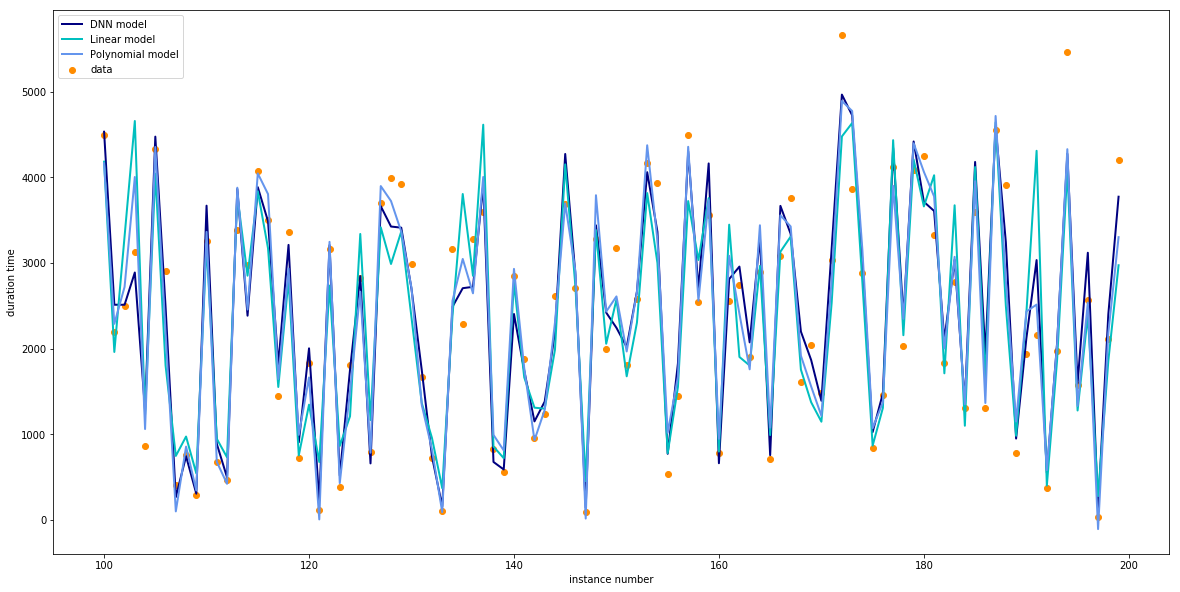

In [367]:
lw = 2
plt.figure(figsize=(20,10))
plt.scatter(X_axi[100:200],predf_list[100:200], color='darkorange', label='data')
#plt.hold('on')
plt.plot(X_axi[100:200], preDNN_list[100:200], color='navy', lw=lw, label='DNN model')
plt.plot(X_axi[100:200], preLR_list[100:200], color='c', lw=lw, label='Linear model')
plt.plot(X_axi[100:200], PrePR_list[100:200], color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('instance number')
plt.ylabel('duration time')
plt.legend()
plt.show()

### DNN - Testing Set
==================== Evaluate The Scaled Set ====================

Testing Set MSE： 142095.30663856378

Testing Set R^2： 0.9269396650066732

Testing Set MAPE(scale back)： 16.679363812776174

### LR - Testing Set
==================== Evaluate The Scaled Set ====================

Testing Set MSE： 300310.4483372071

Testing Set R^2： 0.8455910861762559

Testing Set MAPE(scale back)： 40.97691657733139

### PR - Testing Set
==================== Evaluate The Scaled Set ====================

Testing Set MSE： 160386.5240822607

Testing Set R^2： 0.9175349738491287

Testing Set MAPE(scale back)： 28.258875351680228